# Election data vs Income


In [108]:
import pandas as pd
import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
%matplotlib inline 

In [3]:
df = pd.read_csv("cces18_common_vv.csv")

c:\users\bgagn\pycharmprojects\cces_analysis\venv\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (283,290,464,471) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df['CC18_317'].value_counts().to_frame()

,CC18_317
2.0,21947
1.0,19313
3.0,4618
4.0,398
5.0,201


In [5]:
faminc = df['faminc_new'].value_counts().to_frame().sort_index()
faminc

,faminc_new
1.0,2900
2.0,4365
3.0,5843
4.0,6142
5.0,5281
6.0,5243
7.0,4059
8.0,4266
9.0,5068
10.0,3614


In [36]:
rce = df[['race', 'faminc_new', 'CC18_317']]
rce = rce[rce['race'] == 1.0].dropna()
rce = rce[rce['CC18_317'] <= 2.0]
ce = rce[['faminc_new', 'CC18_317']]
ce.head(5)

,faminc_new,CC18_317
1,6.0,1.0
2,2.0,1.0
4,4.0,2.0
8,6.0,1.0
13,6.0,1.0


In [37]:
# clinton = ce[ce['CC18_317'] == 1.0].drop('CC18_317').astype(int)
clinton = ce[ce['CC18_317'] == 2.0]['faminc_new'].value_counts().to_frame().sort_index().astype(int)
trump = ce[ce['CC18_317'] == 1.0]['faminc_new'].value_counts().to_frame().sort_index().astype(int)

election = pd.DataFrame({'Clinton': clinton['faminc_new'], 'Trump': trump['faminc_new']})
election

,Clinton,Trump
1.0,363,354
2.0,869,974
3.0,1194,1424
4.0,1414,1735
5.0,1294,1566
6.0,1295,1567
7.0,1087,1222
8.0,1165,1378
9.0,1466,1655
10.0,1147,1165


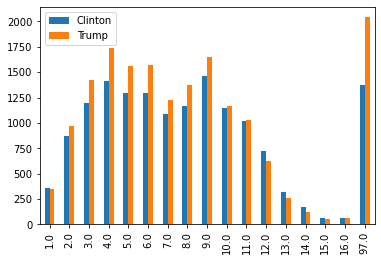

In [38]:
election.plot.bar()
plt.show()



In [94]:
panalysis = df[['CC18_317', 'region', 'urbancity', 'educ', 'gender', 'race', 'birthyr', 'faminc_new', 'pew_religimp']]
# panalysis[['CC18_317', 'region', 'gender', 'urbancity', 'race']] = panalysis[['CC18_317', 'region', 'gender', 'urbancity', 'race']].astype(str)
panalysis[['region', 'gender', 'urbancity', 'race']] = panalysis[['region', 'gender', 'urbancity', 'race']].astype(str)
# panalysis['CC18_317'].replace({'1.0': 'Trump', '2.0': 'Clinton', '3.0': 'Someone else', '4.0': 'Did not vote', '5.0': 'Does not recall'}, inplace=True)
# panalysis['CC18_317'].replace({'1.0': 'Trump', '2.0': 'Clinton', '3.0': 'Someone else', '4.0': 'Did not vote', '5.0': 'Does not recall'}, inplace=True)

panalysis['region'].replace({'1': 'Northeast', '2': 'Midwest', '3': 'South', '4': 'West'}, inplace=True)
panalysis['gender'].replace({'1': 'Male', '2': 'Female'}, inplace=True)
panalysis['urbancity'].replace({'1.0': 'City', '2.0': 'Suburb', '3.0': 'Town', '4.0': 'Rural', '5.0': 'Other'}, inplace=True)
panalysis['race'].replace({'1': 'White', '2': 'Black', '3': 'Hispanic', '4': 'Asian', '5': 'Native American', '6': 'Mixed', '7': 'Other', '8': 'Middle Eastern'}, inplace=True)

panalysis
# by_candidate = panalysis.groupby('CC18_317')
# by_candidate.groups["1.0"]

c:\users\bgagn\pycharmprojects\cces_analysis\venv\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
c:\users\bgagn\pycharmprojects\cces_analysis\venv\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,CC18_317,region,urbancity,educ,gender,race,birthyr,faminc_new,pew_religimp
0,1.0,South,Suburb,4,Female,Native American,1964,8.0,2.0
1,1.0,South,Town,2,Female,White,1971,6.0,1.0
2,1.0,Midwest,City,3,Female,White,1958,2.0,1.0
3,2.0,West,Suburb,6,Female,Asian,1946,13.0,2.0
4,2.0,South,Suburb,2,Female,White,1972,4.0,2.0
...,...,...,...,...,...,...,...,...,...
59995,2.0,Northeast,City,3,Female,White,1993,1.0,4.0
59996,1.0,Midwest,Town,5,Male,White,1982,8.0,1.0
59997,2.0,Midwest,City,3,Female,White,1997,13.0,4.0
59998,1.0,West,City,2,Female,White,1984,2.0,3.0


In [143]:
df_gptest = panalysis[panalysis['CC18_317'] <= 2.0][panalysis['race']=='White'][['birthyr', 'gender', 'CC18_317']]
grouped_test1 = df_gptest.groupby(['birthyr', 'gender'], as_index=False).mean()
grouped_test1
# piv = gptest1.pivot(index='gender', columns='gender')
# piv

# pearson_coef, p_value = stats.pearsonr(panalysis['birthyr'], panalysis['CC18_317'])
# print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

c:\users\bgagn\pycharmprojects\cces_analysis\venv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,birthyr,gender,CC18_317
0,1923,Female,2.000000
1,1924,Male,1.000000
2,1925,Female,1.666667
3,1925,Male,1.500000
4,1926,Female,1.000000
...,...,...,...
149,1998,Male,1.444444
150,1999,Female,1.800000
151,1999,Male,1.272727
152,2000,Female,1.333333


In [105]:
grouped_pivot = grouped_test1.pivot(index='birthyr',columns='gender')
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

CC18_317           
gender     Female       Male
count   77.000000  77.000000
mean     1.567282   1.458650
std      0.140834   0.128062
min      1.000000   1.000000
25%      1.503401   1.384848
50%      1.552632   1.441327
75%      1.677543   1.564885
max      2.000000   1.694444

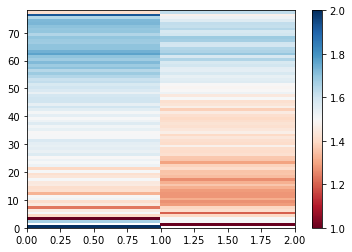

In [106]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()



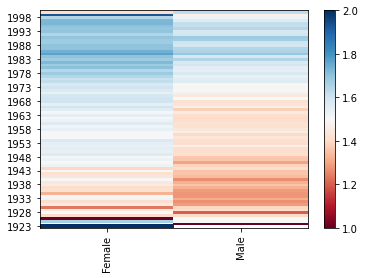

In [128]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0])[::5] + 0.5, minor=False)

# ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels[::5], minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

c:\users\bgagn\pycharmprojects\cces_analysis\venv\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


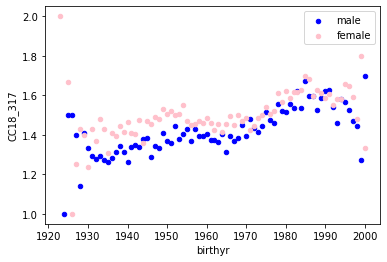

In [144]:
ax1 = fig.add_subplot(111)
male = grouped_test1[grouped_test1['gender'] == 'Male']
female = grouped_test1[grouped_test1['gender'] == 'Female']

ax = male.plot(kind='scatter', x='birthyr', y='CC18_317', color='blue', label='male')
female.plot(kind='scatter', x='birthyr', y='CC18_317', color='pink', label='female', ax=ax)
plt.show()


In [145]:
pearson_coef, p_value = stats.pearsonr(grouped_test1['birthyr'], grouped_test1['CC18_317'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5768767622038551  with a P-value of P = 4.873596345304504e-15


In [146]:
df = pd.read_stata('anes_timeseries_2016.dta')
df.head()

c:\users\bgagn\pycharmprojects\cces_analysis\venv\lib\site-packages\pandas\io\stata.py:1409: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


,version,V160001,V160001_orig,V160101,V160101f,V160101w,V160102,V160102f,V160102w,V160201,...,V168519,V168520,V168521,V168522,V168523,V168524,V168525,V168526,V168527,V168528
0,ANES2016TimeSeries_20190904,1.0,300001.0,0.8270,0.8877,0.0,0.8420,0.9271,0.0,121.0,...,Garret Graves,1. Male,-1. Inap,"-1. Inap, -4,12,14,21,24,51,52,55 in hse_typerace",-1. Inap,81. NO RACE IN STATE: DEMOCRATIC GOVERNOR,-1. Inap,"-1. Inap, 23,24,52,62,81,82,83 in gov_typerace...",-1. Inap,"-1. Inap, 13,14,51,61,81,82,83 in gov_typerace..."
1,ANES2016TimeSeries_20190904,2.0,300002.0,1.0806,1.1605,0.0,1.0133,1.0841,0.0,123.0,...,Stephen A. 'Steve' Womack,1. Male,-1. Inap,"-1. Inap, -4,12,14,21,24,51,52,55 in hse_typerace",-1. Inap,82. NO RACE IN STATE: REPUBLICAN GOVERNOR,-1. Inap,"-1. Inap, 23,24,52,62,81,82,83 in gov_typerace...",-1. Inap,"-1. Inap, 13,14,51,61,81,82,83 in gov_typerace..."
2,ANES2016TimeSeries_20190904,3.0,300003.0,0.3878,0.4161,0.0,0.3672,0.3985,0.0,121.0,...,Steven McCarty Palazzo,1. Male,-1. Inap,"-1. Inap, -4,12,14,21,24,51,52,55 in hse_typerace",-1. Inap,82. NO RACE IN STATE: REPUBLICAN GOVERNOR,-1. Inap,"-1. Inap, 23,24,52,62,81,82,83 in gov_typerace...",-1. Inap,"-1. Inap, 13,14,51,61,81,82,83 in gov_typerace..."
3,ANES2016TimeSeries_20190904,4.0,300004.0,0.3596,0.3852,0.0,0.3663,0.4183,0.0,118.0,...,Marsha Blackburn,2. Female,-1. Inap,"-1. Inap, -4,12,14,21,24,51,52,55 in hse_typerace",-1. Inap,82. NO RACE IN STATE: REPUBLICAN GOVERNOR,-1. Inap,"-1. Inap, 23,24,52,62,81,82,83 in gov_typerace...",-1. Inap,"-1. Inap, 13,14,51,61,81,82,83 in gov_typerace..."
4,ANES2016TimeSeries_20190904,5.0,300006.0,0.6470,0.6931,0.0,0.6463,0.7262,0.0,113.0,...,Bill Johnson,1. Male,-1. Inap,"-1. Inap, -4,12,14,21,24,51,52,55 in hse_typerace",-1. Inap,82. NO RACE IN STATE: REPUBLICAN GOVERNOR,-1. Inap,"-1. Inap, 23,24,52,62,81,82,83 in gov_typerace...",-1. Inap,"-1. Inap, 13,14,51,61,81,82,83 in gov_typerace..."


In [ ]:
df['race']